In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os.path as path
import os
from scipy.stats import chi2
from scipy.stats import t
from tqdm import tqdm
import sympy as sym
from matplotlib import cm


In [ ]:
p1 = [1,1]
p2 = [-1,1]
p3 = [-1,-1]
p4 = [1,-1]

p =[0, 0.5]

In [69]:
## PUNTO A

def Temperatura_espejo(x, y, A):
    suma = 0
    for i in range(2):
        indice = 0
        for j in range(2):
            indice += (A[i][j])*(x**i)*(y**j)
        
        suma += indice
    return suma



x_ = sym.Symbol('x', Real=True)
y_ = sym.Symbol('y', Real=True)

a00 = sym.Symbol('a00', Real=True)
a01 = sym.Symbol('a01', Real=True)
a10 = sym.Symbol('a10', Real=True)
a11 = sym.Symbol('a11', Real=True)

M = ([a00,a01],[a10,a11])

Temperatura_espejo(x_, y_, M)



a00 + a01*y + a10*x + a11*x*y

In [70]:
## PUNTO B

position = np.zeros((4,2)) 

position[0][0], position[0][1] = (1,1) 
position[1][0], position[1][1] = (-1,1)
position[2][0], position[2][1] = (-1,-1)
position[3][0], position[3][1] = (1,-1)

vector_posicion = position
print(vector_posicion)

[[ 1.  1.]
 [-1.  1.]
 [-1. -1.]
 [ 1. -1.]]


In [82]:
## PUNTO C

Matriz = [ [1,1,1,1], [1,-1,1,-1], [1,-1,-1,1], [1,1,-1,-1] ]

temperatura_puntos = [1,2,0.5,0.3]

operador = np.linalg.solve(Matriz, temperatura_puntos)

Coeficientes = [ [operador[0], operador[2]],[operador[1], operador[3]] ]

print(Coeficientes)

[[0.95, 0.55], [-0.3, -0.2]]


In [72]:
## PUNTO D

Temperatura_vertices= ([[Temperatura_espejo(1,1,Coeficientes)],[Temperatura_espejo(-1,1,Coeficientes)], \
                        [Temperatura_espejo(-1,-1,Coeficientes)],[Temperatura_espejo(1,-1,Coeficientes)]])

print(Temperatura_vertices)

[[1.0], [2.0], [0.4999999999999999], [0.29999999999999993]]


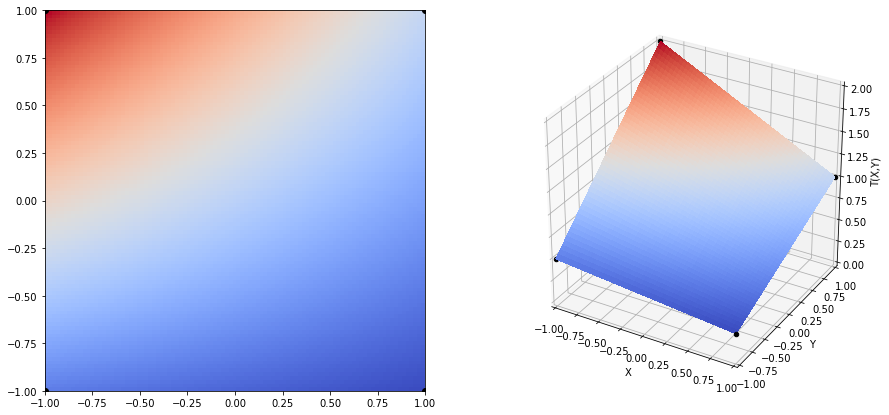

In [74]:
## PUNTO E

x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)

x, y = np.meshgrid(x, y)

T_list = Temperatura_espejo(x,y,Coeficientes)

figura_1 = plt.figure(figsize=(15,7))

ax1 = figura_1.add_subplot(1,2,1)
ax1.pcolor(x, y, T_list, cmap=cm.coolwarm)
ax1.set_ylim(-1,1)
ax1.set_xlim(-1,1)

ax1.scatter(p1[0],p1[1], color='black')
ax1.scatter(p2[0],p2[1], color='black')
ax1.scatter(p3[0],p3[1], color='black')
ax1.scatter(p4[0],p4[1], color='black')


## Figura 2

ax2 = figura_1.add_subplot(1,2,2, projection='3d')
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_zlim(0,2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('T(X,Y)')


ax2.plot_surface(x,y,T_list,cmap=cm.coolwarm,linewidth=0, antialiased=False)

ax2.scatter(p1[0],p1[1],1, color='black')
ax2.scatter(p2[0],p2[1],2, color='black')
ax2.scatter(p3[0],p3[1],0.5, color='black')
ax2.scatter(p4[0],p4[1],0.3, color='black')

plt.show()

In [ ]:
## PUNTO F

Temperatura_error_sensor = Temperatura_espejo(p[0],p[1],Coeficientes)

print(p ,Temperatura_error_sensor)

[0, 0.5] 1.225


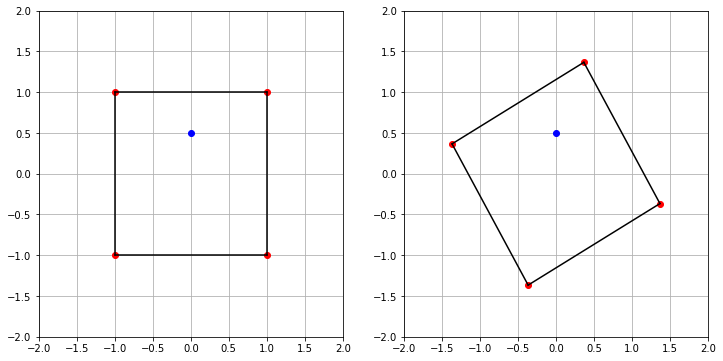

In [91]:
## PUNTO G

def Puntos_Rotados(puntos,angulo):
    
    theta = angulo/180*np.pi
    
    M = np.array( [ [np.cos(theta), -np.sin(theta)], [np.sin(theta),np.cos(theta)] ] )
    
    rotacion = np.zeros((len(puntos),2))
    for i in range(len(puntos)):
        P = np.array(puntos[i])
        Rotacion_P = np.dot(M,P)

        rotacion[i] = Rotacion_P
    
    return rotacion


figura_2 = plt.figure(figsize=(12,6))
ax3 = figura_2.add_subplot(1,2,1)

ax3.scatter(p1[0],p1[1], color='r',zorder=1)
ax3.scatter(p2[0],p2[1], color='r',zorder=1)
ax3.scatter(p3[0],p3[1], color='r',zorder=1)
ax3.scatter(p4[0],p4[1], color='r', zorder=1)
ax3.scatter(p[0],p[1], color='b', zorder=1)

ax3.plot(p1,p2, color='black',zorder=1)
ax3.plot(p2,p3, color='black',zorder=1)
ax3.plot(p3,p4, color='black',zorder=1)
ax3.plot(p4,p1, color='black',zorder=1)

ax3.set_ylim(-2,2)
ax3.set_xlim(-2,2)
ax3.grid()
ax3.set_axisbelow(True)




P_R = Puntos_Rotados(position,30)

ax4 = figura_2.add_subplot(1,2,2)

ax4.scatter(P_R[0][0],P_R[0][1], color='r',zorder=1)
ax4.scatter(P_R[1][0],P_R[1][1], color='r',zorder=1)
ax4.scatter(P_R[2][0],P_R[2][1], color='r',zorder=1)
ax4.scatter(P_R[3][0],P_R[3][1], color='r', zorder=1)
ax4.scatter(p[0],p[1], color='b', zorder=1)

ax4.plot(P_R[1],P_R[0], color='black',zorder=1)
ax4.plot(P_R[2],P_R[1], color='black',zorder=1)
ax4.plot(P_R[3],P_R[2], color='black',zorder=1)
ax4.plot(P_R[0],P_R[3], color='black',zorder=1)

ax4.set_ylim(-2,2)
ax4.set_xlim(-2,2)
ax4.grid()
ax4.set_axisbelow(True)


In [112]:
## PUNTO H

def Rotacion(puntos,temperatura_puntos,angulo):
    
    Matriz = np.ones((4,4))
    RPuntos = Puntos_Rotados(puntos,angulo)
    rows = len(Matriz)

    for i in range(rows):
        Matriz[i][1] *= RPuntos[i][0]
        
    for j in range(rows):
        Matriz[j][2] *= RPuntos[j][1]
        
    for k in range(rows):
        Matriz[k][3] *= RPuntos[k][0]*RPuntos[k][1]
    
    
    if (np.linalg.det(Matriz)) == 0:
        return RPuntos,None
    
    resultado = np.linalg.solve(Matriz,temperatura_puntos)
    R_Coeficientes = np.array( [ [resultado[0],resultado[2]],[resultado[1],resultado[3]] ] )
    
    return RPuntos, R_Coeficientes



#Prueba a 90

R_Puntos, R_Coef = Rotacion(position,temperatura_puntos,90)
print(p)
Temperatura_espejo(p[0],p[1],R_Coef)


[0, 0.5]


0.8

In [111]:
## PUNTO I

phi = np.linspace(0,360,10000)

Temperatura_list = [[],[]]

for i in range(len(phi)):
    Rot_Puntos,Rot_Coef = Rotacion(position,temperatura_puntos,phi[i])
    
    if type(Rot_Coef) != type(None):
        temp = Temperatura_espejo(p[0],p[1],Rot_Coef)
        Temperatura_list [0].append(temp)
        Temperatura_list [1].append(phi[i])
    

print('Temperatura:',np.min(Temperatura_list [0]),'K')
print('Angulo:', Temperatura_list [1][np.argmin(Temperatura_list[0])],'º')


Temperatura: 0.6367508993422235 K
Angulo: 151.3951395139514 º
